In [1]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
if device == "cuda":
    print("GPU found :D Training will be carried out on GPU.")
else:
    print("No GPU found. Training will be carried out on CPU, which might be slower.")

No GPU found. Training will be carried out on CPU, which might be slower.


In the figure below, we have the timeline representation of the cognitive task:

![https://eeg2025.github.io/assets/img/CCD_sequence.png](https://eeg2025.github.io/assets/img/image-2.jpg)


In [ ]:
from pathlib import Path
from eegdash.dataset import EEGChallengeDataset

DATA_DIR = Path("HBN-EEG_data")
DATA_DIR.mkdir(parents=True, exist_ok=True)

dataset_ccd = EEGChallengeDataset(task="contrastChangeDetection",
                                  release="R5", cache_dir=DATA_DIR,
                                  mini=False) # mini=False to download whole release

╭─────────────────────────────────────── EEG 2025 Competition Data Notice ────────────────────────────────────────╮
│ This object loads the HBN dataset that has been preprocessed for the EEG Challenge:                             │
│   * Downsampled from 500Hz to 100Hz                                                                             │
│   * Bandpass filtered (0.5-50 Hz)                                                                               │
│                                                                                                                 │
│ For full preprocessing applied for competition details, see:                                                    │
│   ]8;id=573505;https://github.com/eeg2025/downsample-datasets\https://github.com/eeg2025/downsample-datasets]8;;\                                                                │
│                                                                                                                 │
│ The HBN dataset have some preprocessing applied by the HBN team:                                                │
│   * Re-reference (Cz Channel)                                                                                   │
│                                                                                                                 │
│ IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from ]8;id=311803;https://github.com/sccn/EEGDash/blob/develop/eegdash/api.py\EEGDashDataset]8;;\     │
│ directly.                                                                                                       │
│ If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the    │
│ challenge data.                                                                                                 │
╰────────────────────────────────────────── Source: EEGChallengeDataset ──────────────────────────────────────────╯

In [5]:
dataset_ccd.__dir__()

['release',
 'mini',
 's3_bucket',
 'records',
 'download',
 'n_jobs',
 'eeg_dash_instance',
 'cache_dir',
 'query',
 'data_dir',
 'filesystem',
 'datasets',
 'cumulative_sizes',
 '_target_transform',
 '__module__',
 '__doc__',
 '__init__',
 '__parameters__',
 '_find_local_bids_records',
 '_find_key_in_nested_dict',
 '_find_datasets',
 '_get_sequence',
 '__getitem__',
 'split',
 'get_metadata',
 'transform',
 'target_transform',
 '_outdated_save',
 'description',
 'set_description',
 'save',
 '_save_signals',
 '_save_metadata',
 '_save_description',
 '_save_kwargs',
 '_save_target_name',
 '__annotations__',
 'cumsum',
 '__len__',
 'cummulative_sizes',
 '__orig_bases__',
 '__add__',
 '__dict__',
 '__weakref__',
 '__slots__',
 '_is_protocol',
 '__class_getitem__',
 '__init_subclass__',
 '__new__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce_ex__',
 '__reduce__',
 '_

In [42]:
print(f"INSTANCE = {dataset_ccd.eeg_dash_instance}")
print(f"RELEASE = {dataset_ccd.release}")
print("QUERY")
for k, v in dataset_ccd.query.items():
    print(f"  {k}: {v}")
#print(f"NUMBER OF SUBJS = {len(dataset_ccd.query['subject'])}") # query['subject'] key does not exist if mini=False
print(f"NUMBER OF DATASETS = {len(dataset_ccd.datasets)}")
#print(f"NUMBER OF RECORDINGS PER SUBJ = {int(len(dataset_ccd.datasets)/len(dataset_ccd.query['subject']))} runs") # query['subject'] key does not exist if mini=False
dataset_df = dataset_ccd.description
display(dataset_df.head(9))

# instead we list the subjects via the description dataframe:
subjects = dataset_df["subject"].unique()
print(f"TOTAL NUMBER OF SUBJS = {len(subjects)}")

less_runs = dict([(subj, len(dataset_df[dataset_df["subject"]==subj])) for subj in subjects
                                                                  if len(dataset_df[dataset_df["subject"]==subj]) != 3])
print(f"\nNUMBER OF SUBJS WITH LESS THAN 3 RUNS: {len(less_runs)}")
one_run = dict([(k, v) for k, v in less_runs.items() if v == 1])
two_runs = dict([(k, v) for k, v in less_runs.items() if v == 2])
print(f"    SUBJECTS WITH ONLY 1 RUN: {one_run}")
print(f"    SUBJECTS WITH ONLY 2 RUNS: {two_runs}")

# sanity check that the counting is correct
if len(one_run) + len(two_runs) * 2 + (len(subjects) - len(less_runs)) * 3 != len(dataset_df):
    raise ValueError("Something's wrong with the counting of runs per subject!")

display(dataset_df[dataset_df["subject"].isin(less_runs.keys())])

INSTANCE = <eegdash.api.EEGDash object at 0x15f284ed0>
RELEASE = R5
QUERY
  dataset: ds005509
  task: contrastChangeDetection
NUMBER OF DATASETS = 745


subject  run                     task     age sex release_number  \
0  NDARAC350XUM    3  contrastChangeDetection  8.2120   M             R5   
1  NDARAC350XUM    1  contrastChangeDetection  8.2120   M             R5   
2  NDARAC350XUM    2  contrastChangeDetection  8.2120   M             R5   
3  NDARAC857HDB    1  contrastChangeDetection  6.9750   M             R5   
4  NDARAC857HDB    2  contrastChangeDetection  6.9750   M             R5   
5  NDARAC857HDB    3  contrastChangeDetection  6.9750   M             R5   
6  NDARAH793FBF    1  contrastChangeDetection  9.3427   M             R5   
7  NDARAH793FBF    2  contrastChangeDetection  9.3427   M             R5   
8  NDARAH793FBF    3  contrastChangeDetection  9.3427   M             R5   

   ehq_total commercial_use full_pheno  p_factor  ...  thepresent  \
0      46.69            Yes         No     1.004  ...   available   
1      46.69            Yes         No     1.004  ...   available   
2      46.69            Yes         No     1.004  ...   available   
3      53.36            Yes         No     0.803  ...   available   
4      53.36            Yes         No     0.803  ...   available   
5      53.36            Yes         No     0.803  ...   available   
6      60.03            Yes         No     0.317  ...   available   
7      60.03            Yes         No     0.317  ...   available   
8      60.03            Yes         No     0.317  ...   available   

   diaryofawimpykid  contrastchangedetection_1 contrastchangedetection_2  \
0         available                  available                 available   
1         available                  available                 available   
2         available                  available                 available   
3         available                  available                 available   
4         available                  available                 available   
5         available                  available                 available   
6         available                  available                 available   
7         available                  available                 available   
8         available                  available                 available   

  contrastchangedetection_3 surroundsupp_1 surroundsupp_2 seqlearning6target  \
0                 available      available      available          available   
1                 available      available      available          available   
2                 available      available      available          available   
3                 available      available      available          available   
4                 available      available      available          available   
5                 available      available      available          available   
6                 available      available      available        unavailable   
7                 available      available      available        unavailable   
8                 available      available      available        unavailable   

  seqlearning8target symbolsearch  
0        unavailable      caution  
1        unavailable      caution  
2        unavailable      caution  
3        unavailable      caution  
4        unavailable      caution  
5        unavailable      caution  
6          available    available  
7          available    available  
8          available    available  

[9 rows x 26 columns]

TOTAL NUMBER OF SUBJS = 260

NUMBER OF SUBJS WITH LESS THAN 3 RUNS: 32
    SUBJECTS WITH ONLY 1 RUN: {'NDARJX505XD6': 1, 'NDARMU589LP6': 1, 'NDARXN140AZE': 1}
    SUBJECTS WITH ONLY 2 RUNS: {'NDARAV187GJ5': 2, 'NDARCG159AAP': 2, 'NDARDR804MFE': 2, 'NDARFG953RRK': 2, 'NDARGD425PTN': 2, 'NDARGM196JMM': 2, 'NDARHT019ER6': 2, 'NDARHX963YU1': 2, 'NDARJM296MDW': 2, 'NDARKZ634RVX': 2, 'NDARLD978JVJ': 2, 'NDARLY114PDC': 2, 'NDARMF668NU5': 2, 'NDARMG451PJA': 2, 'NDARMY873XG5': 2, 'NDARNY419GR2': 2, 'NDARPD855ARC': 2, 'NDARPE752VYE': 2, 'NDARPF459CME': 2, 'NDARPK237YHD': 2, 'NDARRB901DWV': 2, 'NDARRX800KW8': 2, 'NDARTD925CTP': 2, 'NDARTG396FGE': 2, 'NDARUV578DU2': 2, 'NDARUX086TVT': 2, 'NDARVB902GA5': 2, 'NDARVG761NR2': 2, 'NDARZM903TNL': 2}


subject  run                     task      age sex release_number  \
30   NDARAV187GJ5    2  contrastChangeDetection  10.4548   M             R5   
31   NDARAV187GJ5    3  contrastChangeDetection  10.4548   M             R5   
65   NDARCG159AAP    2  contrastChangeDetection  10.0218   F             R5   
66   NDARCG159AAP    3  contrastChangeDetection  10.0218   F             R5   
100  NDARDR804MFE    3  contrastChangeDetection  11.6452   F             R5   
..            ...  ...                      ...      ...  ..            ...   
605  NDARVG761NR2    3  contrastChangeDetection  11.0818   M             R5   
606  NDARVG761NR2    2  contrastChangeDetection  11.0818   M             R5   
679  NDARXN140AZE    1  contrastChangeDetection   5.2692   M             R5   
737  NDARZM903TNL    2  contrastChangeDetection   9.5864   F             R5   
738  NDARZM903TNL    3  contrastChangeDetection   9.5864   F             R5   

     ehq_total commercial_use full_pheno  p_factor  ...  thepresent  \
30      -60.03            Yes         No     0.721  ...   available   
31      -60.03            Yes         No     0.721  ...   available   
65      100.05            Yes         No    -0.409  ...   available   
66      100.05            Yes         No    -0.409  ...   available   
100      93.38            Yes         No    -1.450  ...   available   
..         ...            ...        ...       ...  ...         ...   
605      46.69            Yes         No    -0.675  ...   available   
606      46.69            Yes         No    -0.675  ...   available   
679      73.37            Yes         No    -0.182  ...   available   
737     100.05            Yes         No    -0.156  ...   available   
738     100.05            Yes         No    -0.156  ...   available   

     diaryofawimpykid  contrastchangedetection_1 contrastchangedetection_2  \
30          available                unavailable                 available   
31          available                unavailable                 available   
65          available                unavailable                 available   
66          available                unavailable                 available   
100         available                unavailable                 available   
..                ...                        ...                       ...   
605         available                unavailable                 available   
606         available                unavailable                 available   
679         available                  available               unavailable   
737         available                unavailable                 available   
738         available                unavailable                 available   

    contrastchangedetection_3 surroundsupp_1 surroundsupp_2  \
30                  available      available      available   
31                  available      available      available   
65                  available      available      available   
66                  available      available      available   
100                 available      available      available   
..                        ...            ...            ...   
605                 available      available      available   
606                 available      available      available   
679               unavailable      available    unavailable   
737                 available      available      available   
738                 available      available      available   

    seqlearning6target seqlearning8target symbolsearch  
30         unavailable          available    available  
31         unavailable          available    available  
65         unavailable          available    available  
66         unavailable          available    available  
100        unavailable          available    available  
..                 ...                ...          ...  
605        unavailable          available      caution  
606        unavailable          available      caution  
6

In [60]:
%%capture
# since the dataset is large, we will only download a small subset for testing
# using %%capture to suppress the download output
dataset_ccd = EEGChallengeDataset(task="contrastChangeDetection",
                                  release="R5", cache_dir=DATA_DIR,
                                  mini=True) # mini=True to download only a small subset for testing
dataset_df = dataset_ccd.description
subjects = dataset_ccd.query["subject"]

raw = dataset_ccd.datasets[0].raw  # download the Raw object of the first recording

In [61]:
import os
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, "").count(os.sep)
        indent = " " * 4 * (level)
        print("{}{}/".format(indent, os.path.basename(root))) # get the last component of the path
        subindent = " " * 4 * (level + 1)
        for f in files:
            if "DS_Store" not in f:  # skip macOS .DS_Store files
                print("{}{}".format(subindent, f))
list_files("HBN-EEG_data")

HBN-EEG_data/
    ds005509-bdf-mini/
        task-DespicableMe_events.json
        task-ThePresent_eeg.json
        task-seqLearning6target_eeg.json
        task-seqLearning8target_events.json
        task-ThePresent_events.json
        task-FunwithFractals_eeg.json
        task-seqLearning8target_eeg.json
        task-surroundSupp_events.json
        task-DiaryOfAWimpyKid_events.json
        task-contrastChangeDetection_events.json
        task-symbolSearch_eeg.json
        task-RestingState_eeg.json
        task-FunwithFractals_events.json
        task-RestingState_events.json
        task-DiaryOfAWimpyKid_eeg.json
        dataset_description.json
        task-contrastChangeDetection_eeg.json
        task-DespicableMe_eeg.json
        task-symbolSearch_events.json
        participants.tsv
        task-surroundSupp_eeg.json
        task-seqLearning6target_events.json
        sub-NDARAH793FBF/
            eeg/
                sub-NDARAH793FBF_task-contrastChangeDetection_run-3_events.t

In [62]:
print(f"type(raw) = {type(raw)}")
display(raw.info)
print(f"Raw data shape = {raw.get_data().shape}")

type(raw) = <class 'mne.io.edf.edf.RawEDF'>


<Info | 9 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 129 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 line_freq: 60.0
 lowpass: 50.0 Hz
 meas_date: 2025-08-19 00:06:17 UTC
 nchan: 129
 projs: []
 sfreq: 100.0 Hz
 subject_info: <subject_info | his_id: sub-NDARAH793FBF, sex: 1, birthday: 2016-04-15>
>

Raw data shape = (129, 34900)


In [63]:
import mne
import os

# Create the directory
dir_name = "EEGLAB"
try:
    os.makedirs(f"HBN-EEG_data/{dir_name}")
    print(f"Directory 'HBN-EEG_data/{dir_name}' created successfully.")
except FileExistsError:
    pass

for subj in subjects:
    try:
        os.makedirs(f"HBN-EEG_data/{dir_name}/sub-{subj}")
    except FileExistsError:
        pass
print(f"Directories for all subjects created successfully inside 'HBN-EEG_data/{dir_name}'.")

subj_id = dataset_df.iloc[0]["subject"]
run_id = dataset_df.iloc[0]["run"]
print(f"Subject ID: {subj_id}, Run ID: {run_id}")

mne.export.export_raw(f"HBN-EEG_data/EEGLAB/sub-{subj_id}/original_{subj_id}-run{run_id}.set", raw, overwrite=True)

Directory 'HBN-EEG_data/EEGLAB' created successfully.
Directories for all subjects created successfully inside 'HBN-EEG_data/EEGLAB'.
Subject ID: NDARAH793FBF, Run ID: 1
Reading 0 ... 34899  =      0.000 ...   348.990 secs...


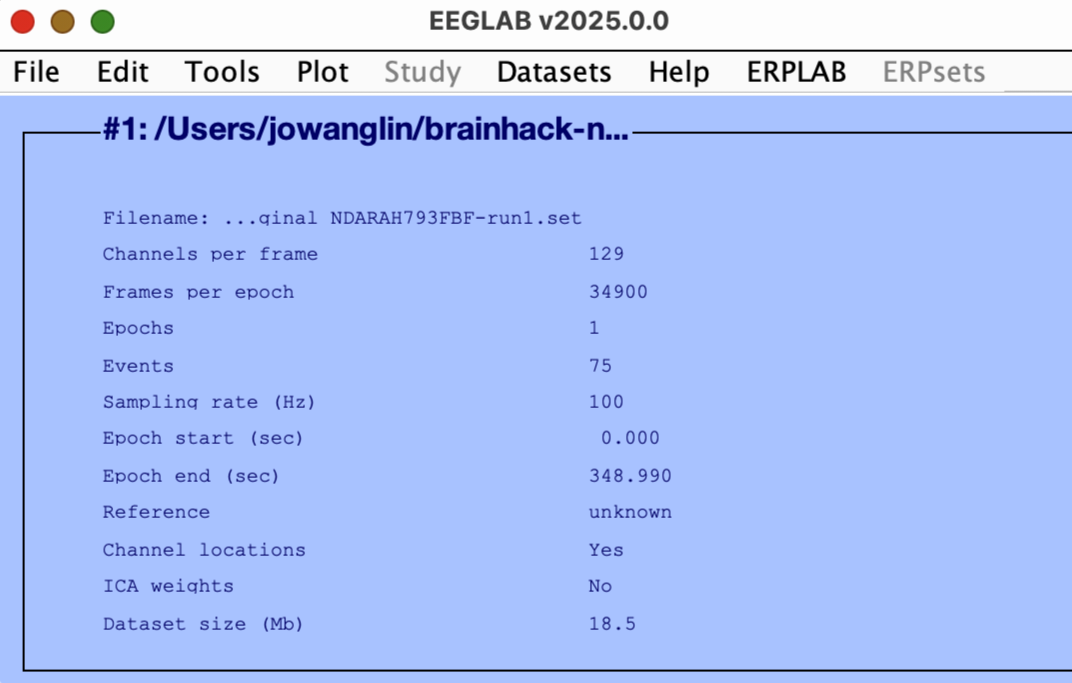

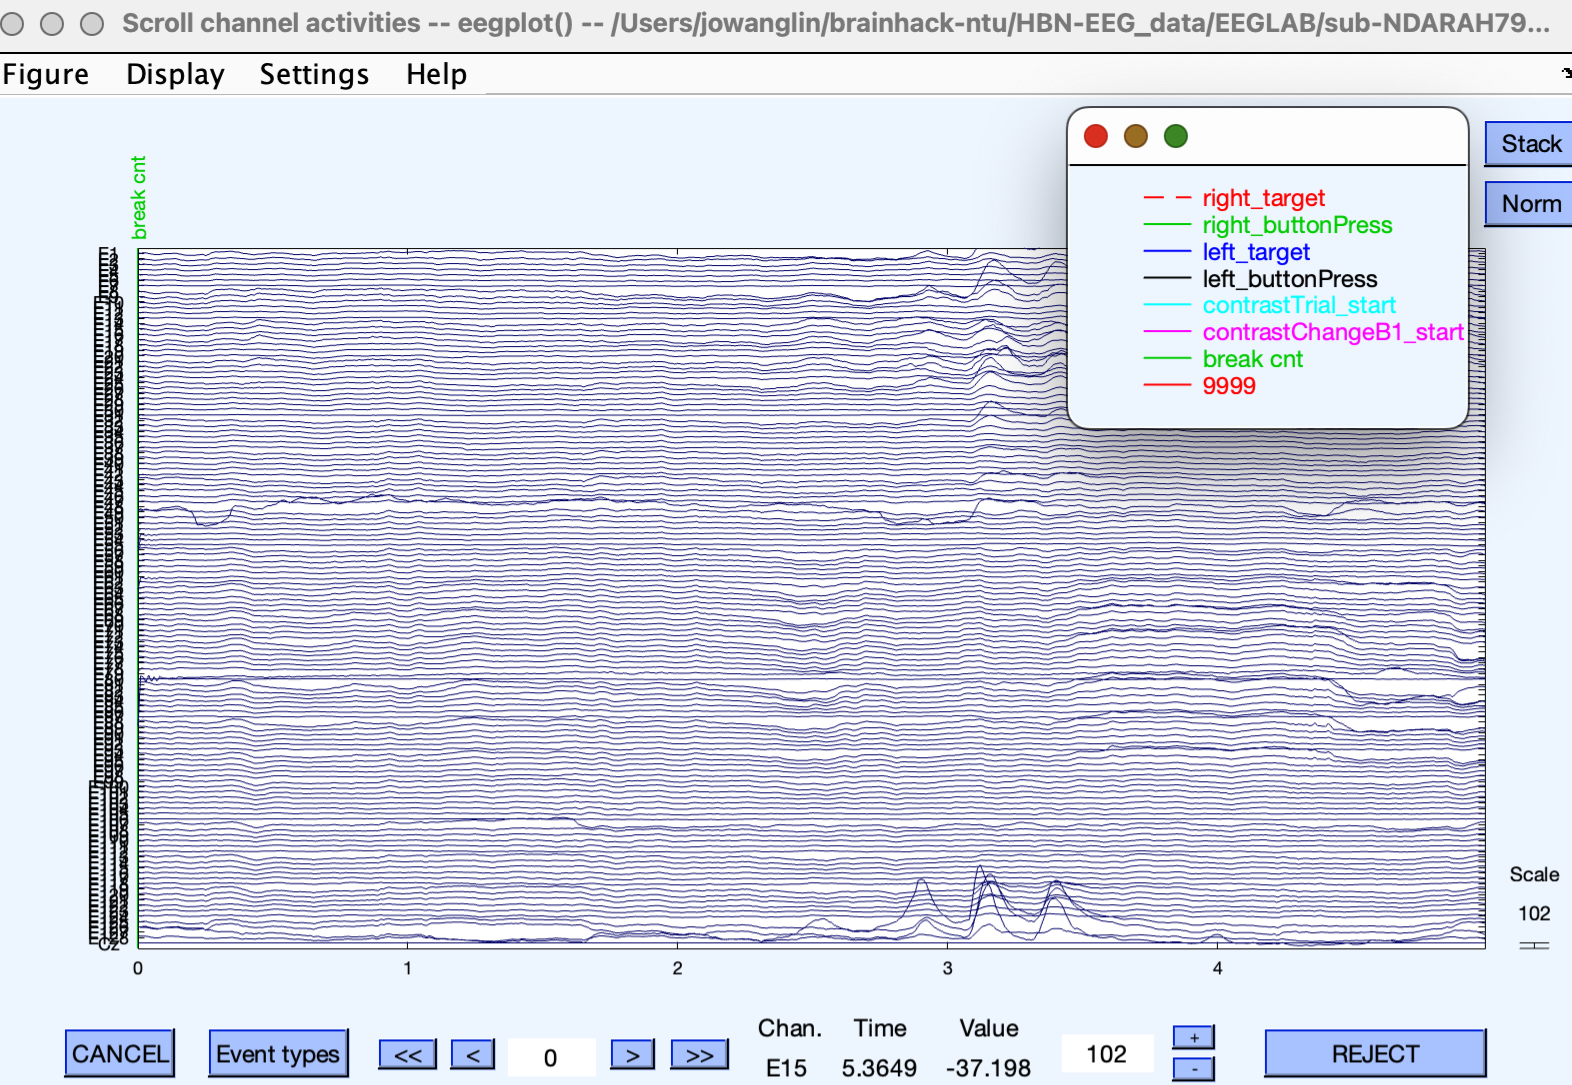

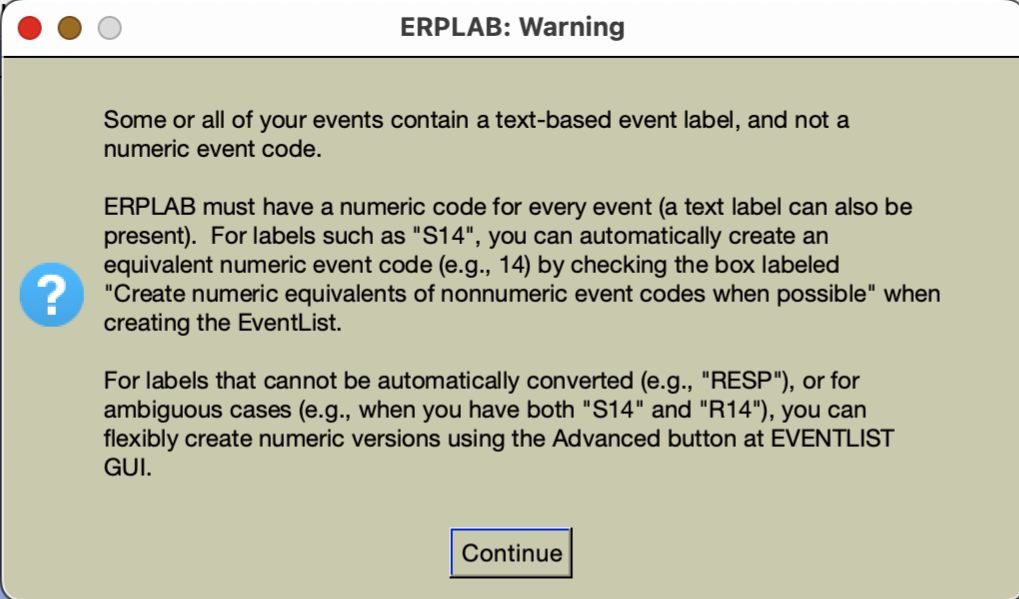

In [ ]:
# display cell; don't run
from IPython.display import Image, display

display(Image(filename="screenshots/info.png", width=500))
display(Image(filename="screenshots/data-scroll.png", width=500))
display(Image(filename="screenshots/text-labels.png", width=500))

As we've seen in the directory tree, the `eegdash` dataset object downloads data only when necessary: in this case, only the first recording and its related metadata were downloaded. Here, we use `joblib.Parallel` and `joblib.delayed` to download all data in parallel instead of doing:
```
raws = []
for d in dataset_ccd.datasets:
    raws.append(d.raw)
```
which runs _sequentially_.

Note also that `joblib.delayed` prevents each functuion `(lambda d: d.raw)(d)` from being executed immediately; it wraps each function and its arguments into a _"job" object_ for `joblib.Parallel` to assign them to workers for parallel download.

In [ ]:
# download all Raw objects in parallel
from joblib import Parallel, delayed

# n_jobs=-1 uses as many workers as available CPU cores (not tensor operations; GPU irrelevant here)
raws = Parallel(n_jobs=-1)(
    delayed(lambda d: d.raw)(d) for d in dataset_ccd.datasets
)

## 2. Creating the windows of interest

Now that we have our raw dataset, defining the windows/epoch interval is essential.

For this challenge, we test many different and semantically different regions of interest, and our preliminary studies show us that the most interesting area of interest is defined below:


*        stimulus         │        response         │        feedback
*                         │ *********************** (stimulus + 0.5)

So we epoch after the stimulus moment with a beginning shift of 500 ms.

In [69]:
#@title ▶️ Run this first to get all the utils functions for the epoching
from braindecode.datasets import BaseConcatDataset
import copy
import numpy as np


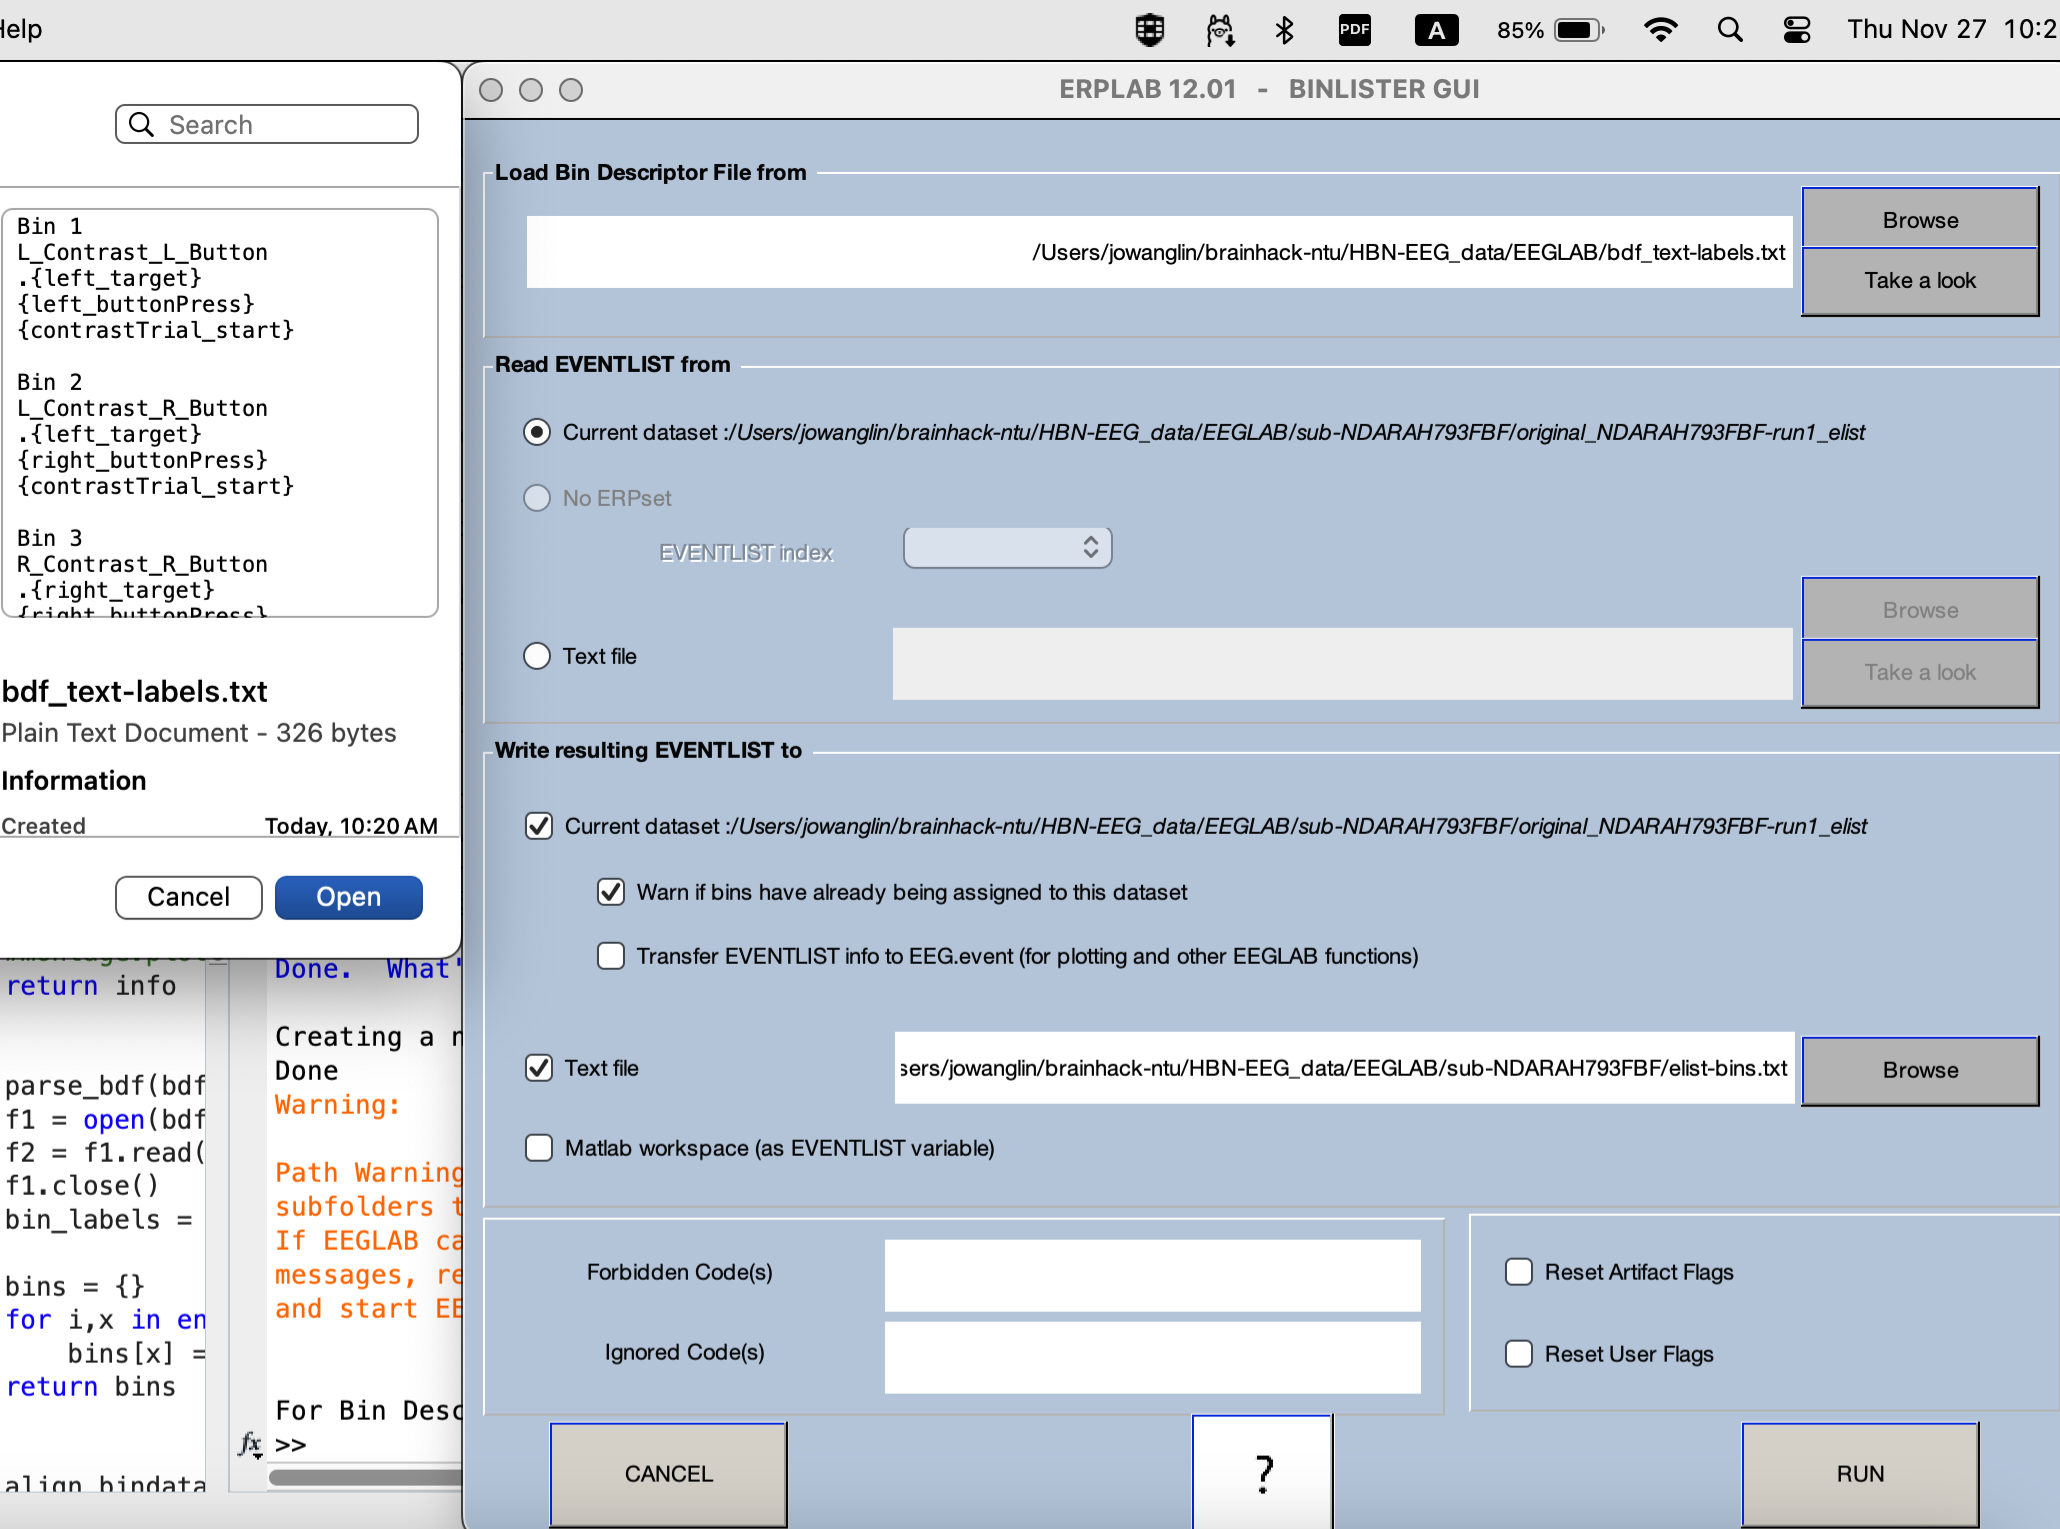

In [ ]:
# display cell; don't run
display(Image(filename="screenshots/binlister.png", width=500))

In [76]:
annot = copy.deepcopy(raw.annotations)
print(f"ANNOTATIONS LENGTH = {len(annot)}\n")

description_to_event_code = {}
for _, a in enumerate(annot):
    if _ <= 10:
        print(annot[_]) 
    description_to_event_code[str(a["description"])] = a["extras"]["event_code"]

description_to_event_code["break cnt"] = "0"
print("\n")
print(description_to_event_code)

ANNOTATIONS LENGTH = 75

OrderedDict([('onset', np.float64(0.0)), ('duration', np.float64(0.0)), ('description', np.str_('break cnt')), ('orig_time', datetime.datetime(2025, 8, 19, 0, 6, 17, tzinfo=datetime.timezone.utc)), ('extras', {np.str_('feedback'): 'n/a', np.str_('event_code'): 'break cnt'})])
OrderedDict([('onset', np.float64(96.766)), ('duration', np.float64(0.0)), ('description', np.str_('contrastChangeB1_start')), ('orig_time', datetime.datetime(2025, 8, 19, 0, 6, 17, tzinfo=datetime.timezone.utc)), ('extras', {np.str_('feedback'): 'n/a', np.str_('event_code'): '94'})])
OrderedDict([('onset', np.float64(107.24)), ('duration', np.float64(0.0)), ('description', np.str_('contrastTrial_start')), ('orig_time', datetime.datetime(2025, 8, 19, 0, 6, 17, tzinfo=datetime.timezone.utc)), ('extras', {np.str_('feedback'): 'n/a', np.str_('event_code'): '5'})])
OrderedDict([('onset', np.float64(110.062)), ('duration', np.float64(0.0)), ('description', np.str_('right_target')), ('orig_time'

In [14]:
description_to_event_code = {"break cnt": "0", "contrastChangeB1_start": "94", "contrastTrial_start": "5",
                              "right_target": "9", "right_buttonPress": "13", "left_target": "8", "left_buttonPress": "12",
                              "9999": "9999"}
event_code_to_description = {v: k for k, v in description_to_event_code.items()}
event_code_to_description.pop(0, None)
event_code_to_description["break cnt"] = "break cnt"
orig_time = annot[0]["orig_time"]

def get_numeric_event_codes(raw):
    annot = copy.deepcopy(raw.annotations)
    items = {}
    for __annotations__, key in enumerate(annot[0].keys()): items[key] = []
    for i in range(len(annot)):
        for _, key in enumerate(annot[i].keys()):
            if key == "description":
                items[key].append(description_to_event_code[annot[i][key]])
            elif key == "extras":
                annot[i][key]["verbose"] = event_code_to_description[annot[i][key]["event_code"]]
                annot[i][key].pop("event_code", None)
                items[key].append(annot[i][key])
            else:
                items[key].append(annot[i][key])
    new_annot = mne.Annotations(np.array(items["onset"], dtype=object),
                            np.array(items["duration"], dtype=object),
                            np.array(items["description"], dtype=object),
                            orig_time=orig_time, ch_names=None,
                            extras = items["extras"])
    new_raw = raw.copy().set_annotations(new_annot)   
    return new_raw

new_raw = get_numeric_event_codes(raw)
print(f"Original annotations index [10]:\n  {raw.annotations[10]}")
print(f"New annotations index [10]:\n  {new_raw.annotations[10]}")

Original annotations index [10]:
  OrderedDict([('onset', np.float64(124.04)), ('duration', np.float64(0.0)), ('description', np.str_('right_buttonPress')), ('orig_time', datetime.datetime(2025, 8, 19, 0, 6, 17, tzinfo=datetime.timezone.utc)), ('extras', {np.str_('event_code'): '13', np.str_('feedback'): 'smiley_face'})])
New annotations index [10]:
  OrderedDict([('onset', np.float64(124.04)), ('duration', np.float64(0.0)), ('description', np.str_('13')), ('orig_time', datetime.datetime(2025, 8, 19, 0, 6, 17, tzinfo=datetime.timezone.utc)), ('extras', {np.str_('feedback'): 'smiley_face', 'verbose': 'right_buttonPress'})])


In [15]:
mne.export.export_raw("HBN-EEG_data/EEGLAB/sub-NDARAH793FBF/s1-run1.set", new_raw, overwrite=True)

Overwriting existing file.


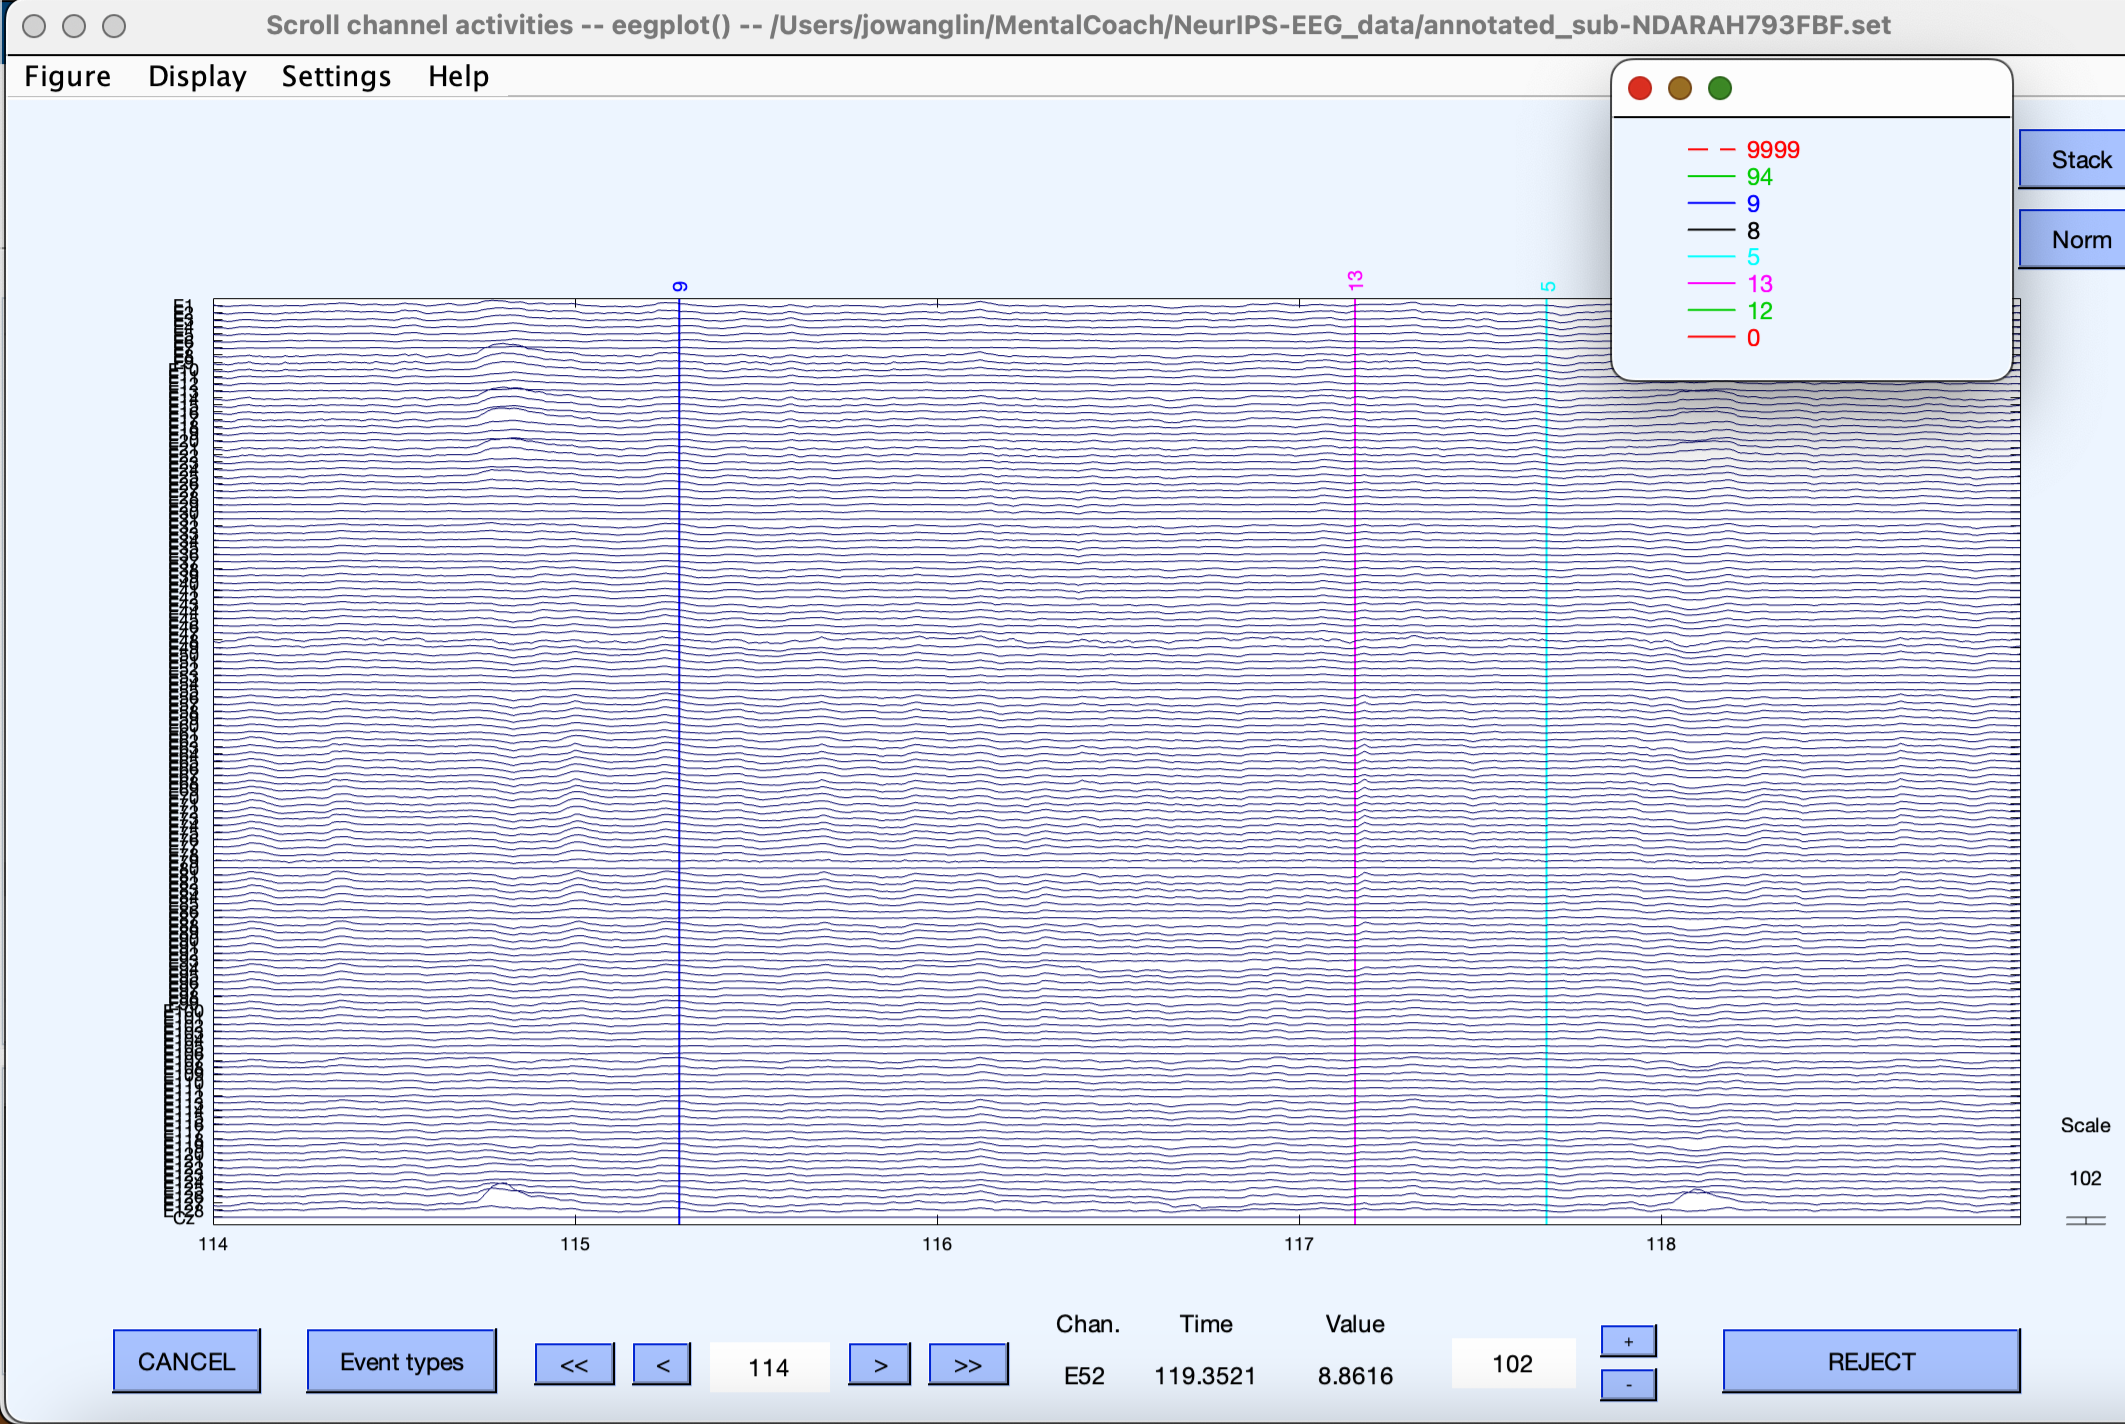

In [94]:
reannotated_img = "/Users/jowanglin/Downloads/NDARAH793FBF-reannotated.png"
display(Image(filename=reannotated_img, width=500))

So, on our raw data, we fit the events present in it, and create a window of interest.

In [5]:
import pandas as pd
from braindecode.preprocessing import preprocess, Preprocessor, create_windows_from_events
from eegdash.hbn.windows import (
    build_trial_table,
    annotate_trials_with_target,
    add_aux_anchors,
    add_extras_columns,
    keep_only_recordings_with,
)

dataset_ccd_copy = EEGChallengeDataset(task="contrastChangeDetection",
                                       release="R5", cache_dir=DATA_DIR,
                                       mini=True)

╭─────────────────────────────────────── EEG 2025 Competition Data Notice ────────────────────────────────────────╮
│ This object loads the HBN dataset that has been preprocessed for the EEG Challenge:                             │
│   * Downsampled from 500Hz to 100Hz                                                                             │
│   * Bandpass filtered (0.5-50 Hz)                                                                               │
│                                                                                                                 │
│ For full preprocessing applied for competition details, see:                                                    │
│   ]8;id=716790;https://github.com/eeg2025/downsample-datasets\https://github.com/eeg2025/downsample-datasets]8;;\                                                                │
│                                                                                                                 │
│ The HBN dataset have some preprocessing applied by the HBN team:                                                │
│   * Re-reference (Cz Channel)                                                                                   │
│                                                                                                                 │
│ IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from ]8;id=806104;https://github.com/sccn/EEGDash/blob/develop/eegdash/api.py\EEGDashDataset]8;;\     │
│ directly.                                                                                                       │
│ If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the    │
│ challenge data.                                                                                                 │
╰────────────────────────────────────────── Source: EEGChallengeDataset ──────────────────────────────────────────╯

In [6]:
events_df = pd.read_csv("HBN-EEG_data/ds005509-bdf-mini/sub-NDARAH793FBF/eeg/sub-NDARAH793FBF_task-contrastChangeDetection_run-1_events.tsv", sep="\t")
print("events_df")
display(events_df.head(10))
trial_table = build_trial_table(events_df)
print("trial_table")
display(trial_table.head(10))

events_df


onset  duration                   value event_code     feedback
0    0.000       NaN               break cnt  break cnt          NaN
1   96.766       NaN  contrastChangeB1_start         94          NaN
2  107.240       NaN     contrastTrial_start          5          NaN
3  110.062       NaN            right_target          9          NaN
4  112.172       NaN       right_buttonPress         13  smiley_face
5  112.488       NaN     contrastTrial_start          5          NaN
6  115.290       NaN            right_target          9          NaN
7  117.160       NaN       right_buttonPress         13  smiley_face
8  117.690       NaN     contrastTrial_start          5          NaN
9  122.090       NaN            right_target          9          NaN

trial_table


trial_start_onset  trial_stop_onset  stimulus_onset  response_onset  \
0            107.240           112.488         110.062         112.172   
1            112.488           117.690         115.290         117.160   
2            117.690           124.490         122.090         124.040   
3            124.490           132.890         130.490         132.590   
4            132.890           138.090         135.690         136.910   
5            138.090           143.290         140.890         142.720   
6            143.290           150.090         147.690         149.552   
7            150.090           156.892         154.490             NaN   
8            156.892           163.690         161.290         162.920   
9            163.690           170.490         168.090         169.560   

   rt_from_stimulus  rt_from_trialstart      response_type correct  
0             2.110               4.932  right_buttonPress    True  
1             1.870               4.672  right_buttonPress    True  
2             1.950               6.350  right_buttonPress    True  
3             2.100               8.100  right_buttonPress    True  
4             1.220               4.020   left_buttonPress    True  
5             1.830               4.630  right_buttonPress    True  
6             1.862               6.262  right_buttonPress    True  
7               NaN                 NaN               None    None  
8             1.630               6.028   left_buttonPress    True  
9             1.470               5.870  right_buttonPress    True

In [16]:
EPOCH_LEN_S = 2.0
SFREQ = raw.info["sfreq"] # 100

annotate_raw = copy.deepcopy(new_raw)
annotate_trials_with_target(annotate_raw, target_field="rt_from_stimulus", epoch_length=EPOCH_LEN_S)
print("Created new annotations with `eegdash.hbn.annotate_trials_with_target` for s1-run1 raw object:")
for _ in range(6):
    print("  ", annotate_raw.annotations[_])

add_aux_anchors(annotate_raw, stim_desc="stimulus_anchor", resp_desc="response_anchor")
print("\nAdded auxiliary annotations (stimulus & response onsets) with `eegdash.hbn.add_aux_anchors` for s1-run1 raw object:")
for _ in range(6):
    print("  ", annotate_raw.annotations[_])

Created new annotations with `eegdash.hbn.annotate_trials_with_target` for s1-run1 raw object:
   OrderedDict([('onset', np.float64(107.24)), ('duration', np.float64(2.0)), ('description', np.str_('contrast_trial_start')), ('orig_time', datetime.datetime(2025, 8, 19, 0, 6, 17, tzinfo=datetime.timezone.utc)), ('extras', {'target': 2.1099999999999994, 'rt_from_stimulus': 2.1099999999999994, 'rt_from_trialstart': 4.932000000000002, 'stimulus_onset': 110.062, 'response_onset': 112.172, 'correct': 1, 'response_type': 'right_buttonPress'})])
   OrderedDict([('onset', np.float64(112.488)), ('duration', np.float64(2.0)), ('description', np.str_('contrast_trial_start')), ('orig_time', datetime.datetime(2025, 8, 19, 0, 6, 17, tzinfo=datetime.timezone.utc)), ('extras', {'target': 1.8699999999999903, 'rt_from_stimulus': 1.8699999999999903, 'rt_from_trialstart': 4.671999999999997, 'stimulus_onset': 115.29, 'response_onset': 117.16, 'correct': 1, 'response_type': 'right_buttonPress'})])
   OrderedDi

In [17]:
EPOCH_LEN_S = 2.0
SFREQ = 100 

transformation_offline = [
    Preprocessor(
        annotate_trials_with_target,
        target_field="rt_from_stimulus", epoch_length=EPOCH_LEN_S,
        require_stimulus=True, require_response=True,
        apply_on_array=False,
    ),
    Preprocessor(add_aux_anchors, apply_on_array=False)   
]
preprocess(dataset_ccd_copy, transformation_offline, n_jobs=1)

STIM_LOCK = "stimulus_anchor"
SHIFT_AFTER_STIM = 0.5
TRIAL_DURATION = 2.0

# Keep only recordings that actually contain stimulus anchors
dataset = keep_only_recordings_with(STIM_LOCK, dataset_ccd_copy)

# Create single-interval windows (stim-locked, long enough to include the response)
single_windows_epochs = create_windows_from_events(
    dataset,
    mapping={STIM_LOCK: 0}, # `stimulus_anchor` (not `contrast_trial_start`) is the "trial start" event for `create_windows_from_events`
    trial_start_offset_samples=int(SHIFT_AFTER_STIM * SFREQ),                 # +0.5 s
    trial_stop_offset_samples=int((SHIFT_AFTER_STIM + TRIAL_DURATION) * SFREQ),   # +2.5 s
    window_size_samples=int(EPOCH_LEN_S * SFREQ),
    window_stride_samples=SFREQ,
    preload=True,
    use_mne_epochs=True
)
print("mne.Epochs object for s1-run1, encapsulated in WindowsDataset objects") # Substantially slower that EEGWindowsDataset
display(single_windows_epochs.datasets[0].windows)

Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_(

<Epochs | 21 events (all good), 0 – 1.99 s (baseline off), ~4.2 MiB, data loaded, with metadata,
 np.str_('stimulus_anchor'): 21>

In [18]:
# use_mne_epochs=None (default value)
single_windows = create_windows_from_events(
    dataset,
    mapping={STIM_LOCK: 0},
    trial_start_offset_samples=int(SHIFT_AFTER_STIM * SFREQ),                 # +0.5 s
    trial_stop_offset_samples=int((SHIFT_AFTER_STIM + TRIAL_DURATION) * SFREQ),   # +2.5 s
    window_size_samples=int(EPOCH_LEN_S * SFREQ),
    window_stride_samples=SFREQ,
    preload=True,
)

# Injecting metadata into the extra mne annotation.
single_windows = add_extras_columns(
    single_windows,
    dataset,
    desc=STIM_LOCK,
    keys=("target", "rt_from_stimulus", "rt_from_trialstart",
          "stimulus_onset", "response_onset", "correct", "response_type")
    )
meta_info = single_windows.get_metadata()
display(meta_info.head(10))

Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_(

i_window_in_trial  i_start_in_trial  i_stop_in_trial  target  \
0                  0             11056            11256    2.11   
1                  0             11579            11779    1.87   
2                  0             12259            12459    1.95   
3                  0             13099            13299     2.1   
4                  0             13619            13819    1.22   
5                  0             14139            14339    1.83   
6                  0             14819            15019   1.862   
7                  0             16179            16379    1.63   
8                  0             16859            17059    1.47   
9                  0             17699            17899    1.99   

   rt_from_stimulus  rt_from_trialstart  stimulus_onset  response_onset  \
0              2.11               4.932         110.062         112.172   
1              1.87               4.672          115.29          117.16   
2              1.95                6.35          122.09          124.04   
3               2.1                 8.1          130.49          132.59   
4              1.22                4.02          135.69          136.91   
5              1.83                4.63          140.89          142.72   
6             1.862               6.262          147.69         149.552   
7              1.63               6.028          161.29          162.92   
8              1.47                5.87          168.09          169.56   
9              1.99                7.99          176.49          178.48   

   correct      response_type  ... thepresent  diaryofawimpykid  \
0        1  right_buttonPress  ...  available         available   
1        1  right_buttonPress  ...  available         available   
2        1  right_buttonPress  ...  available         available   
3        1  right_buttonPress  ...  available         available   
4        1   left_buttonPress  ...  available         available   
5        1  right_buttonPress  ...  available         available   
6        1  right_buttonPress  ...  available         available   
7        1   left_buttonPress  ...  available         available   
8        1  right_buttonPress  ...  available         available   
9        1   left_buttonPress  ...  available         available   

  contrastchangedetection_1  contrastchangedetection_2  \
0                 available                  available   
1                 available                  available   
2                 available                  available   
3                 available                  available   
4                 available                  available   
5                 available                  available   
6                 available                  available   
7                 available                  available   
8                 available                  available   
9                 available                  available   

  contrastchangedetection_3 surroundsupp_1  surroundsupp_2 seqlearning6target  \
0                 available      available       available        unavailable   
1                 available      available       available        unavailable   
2                 available      available       available        unavailable   
3                 available      available       available        unavailable   
4                 available      available       available        unavailable   
5                 available      available       available        unavailable   
6                 available      available       available        unavailable   
7                 available      available       available        unavailable   
8                 available      available       available        unavailable   
9                 available      available       available        unavailable   

  seqlearning8target  symbolsearch  
0          available     available  
1          available     available  
2          available     available  
3          available  

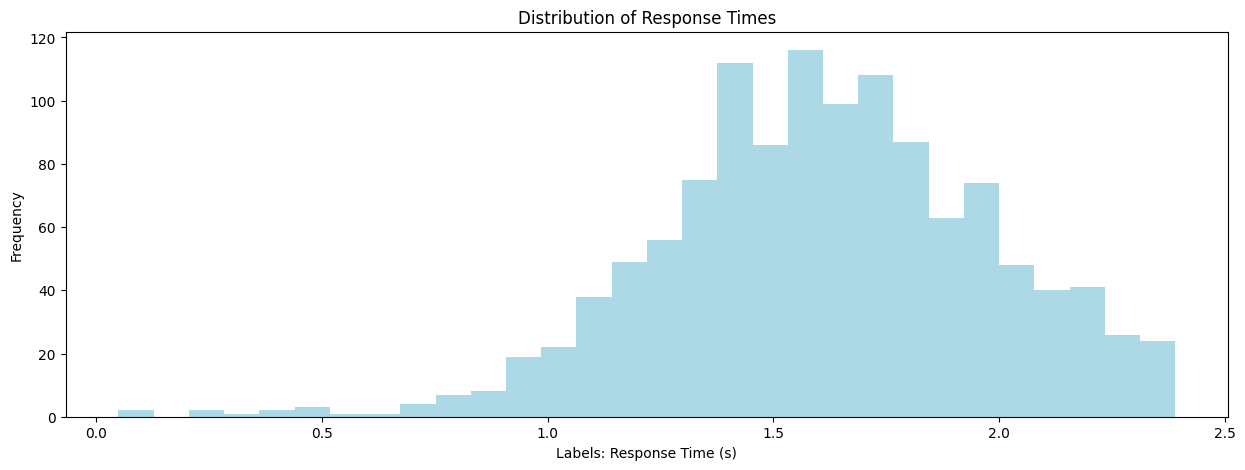

In [19]:
from matplotlib.pylab import plt

fig, ax = plt.subplots(figsize=(15, 5))
ax = meta_info["target"].plot.hist(bins=30, ax=ax, color='lightblue')
ax.set_xlabel("Labels: Response Time (s)")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Response Times")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

valid_frac = 0.1
test_frac = 0.1
seed = 2025

subjects = meta_info["subject"].unique()
# don't know why they're removed here (?)
sub_rm = ["NDARWV769JM7", "NDARME789TD2", "NDARUA442ZVF", "NDARJP304NK1",
          "NDARTY128YLU", "NDARDW550GU6", "NDARLD243KRE", "NDARUJ292JXV", "NDARBA381JGH"]
subjects = [s for s in subjects if s not in sub_rm]

# dividing at the subject-level for better generalization across subjects (?)
train_subj, valid_test_subject = train_test_split(
    subjects, test_size=(valid_frac + test_frac), random_state=check_random_state(seed), shuffle=True
)

valid_subj, test_subj = train_test_split(
    valid_test_subject, test_size=test_frac, random_state=check_random_state(seed + 1), shuffle=True
)
# sanity check via set union
assert (set(valid_subj) | set(test_subj) | set(train_subj)) == set(subjects)

In [21]:
# split the dataset based on information listed in its description
# `subject_split` is a dict with the name of the split (a string) as key and the dataset as value
subject_split = single_windows.split(by = "subject")

train_set = []
valid_set = []
test_set = []

for s in subject_split:
    if s in train_subj:
        train_set.append(subject_split[s])
    elif s in valid_subj:
        valid_set.append(subject_split[s])
    elif s in test_subj:
        test_set.append(subject_split[s])

train_set = BaseConcatDataset(train_set)
valid_set = BaseConcatDataset(valid_set)
test_set = BaseConcatDataset(test_set)

print("Number of examples in each split in the mini-release")
print(f"Train:\t{len(train_set)}")
print(f"Valid:\t{len(valid_set)}")
print(f"Test:\t{len(test_set)}")

Number of examples in each split in the mini-release
Train:	981
Valid:	183
Test:	50


In [23]:
# pytorch datasets and dataloaders
from torch.utils.data import DataLoader

batch_size = 128
num_workers = 1 # can increase for faster data loading

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=num_workers)
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=False, num_workers=num_workers)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=num_workers)

In [24]:
from braindecode.models.util import models_dict

names = sorted(models_dict)
w = max(len(n) for n in names)

for i in range(0, len(names), 3):
    row = names[i:i+3]
    print("  ".join(f"{n:<{w}}" for n in row))

ATCNet                  AttentionBaseNet        AttnSleep             
BDTCN                   BIOT                    CTNet                 
ContraWR                Deep4Net                DeepSleepNet          
EEGConformer            EEGITNet                EEGInceptionERP       
EEGInceptionMI          EEGMiner                EEGNeX                
EEGNet                  EEGSimpleConv           EEGTCNet              
FBCNet                  FBLightConvNet          FBMSNet               
IFNet                   Labram                  MSVTNet               
SCCNet                  SPARCNet                ShallowFBCSPNet       
SignalJEPA              SignalJEPA_Contextual   SignalJEPA_PostLocal  
SignalJEPA_PreLocal     SincShallowNet          SleepStagerBlanco2020 
SleepStagerChambon2018  SyncNet                 TIDNet                
TSception               USleep                


In [ ]:
# input shape: (batch_size, n_channels, n_times)
from braindecode.models import EEGNeX

model = EEGNeX(n_chans=129,  # 129 channels
               n_outputs=1,  # 1 output for regression
               n_times=200,  # 2 secs * sfreq
               sfreq=100,    # sample frequency 100 Hz
        )
print(model)

Layer (type (var_name):depth-idx)                            Input Shape               Output Shape              Param #                   Kernel Shape
EEGNeX (EEGNeX)                                              [1, 129, 200]             [1, 1]                    --                        --
├─Sequential (block_1): 1-1                                  [1, 129, 200]             [1, 8, 129, 200]          --                        --
│    └─Rearrange (0): 2-1                                    [1, 129, 200]             [1, 1, 129, 200]          --                        --
│    └─Conv2d (1): 2-2                                       [1, 1, 129, 200]          [1, 8, 129, 200]          512                       [1, 64]
│    └─BatchNorm2d (2): 2-3                                  [1, 8, 129, 200]          [1, 8, 129, 200]          16                        --
├─Sequential (block_2): 1-2                                  [1, 8, 129, 200]          [1, 32, 129, 200]         --                  

### The rest is our classic PyTorch/torch lighting/skorch training pipeline

In [49]:
# Defining training parameters

lr = 1E-3
weight_decay = 1E-5
n_epochs = 100
early_stopping_patience = 50

In [50]:
from typing import Optional
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
from torch.nn import Module
from torch.optim.lr_scheduler import LRScheduler

# Define a method for training one epoch
def train_one_epoch(
    dataloader: DataLoader,
    model: Module,
    loss_fn,
    optimizer,
    scheduler: Optional[LRScheduler],
    device,
    print_batch_stats: bool = True,
):
    model.train()

    total_loss = 0.0
    ### sum_sq_err = 0.0 ###
    mse_sum = 00
    ### n_samples = 0 ###
    number_of_samples = 0

    progress_bar = tqdm(
        enumerate(dataloader),
        total=len(dataloader),
        disable=not print_batch_stats
    )

    for batch_idx, batch in progress_bar:
        # Support datasets that may return (X, y) or (X, y, ...)
        X, y = batch[0], batch[1]
        X, y = X.to(device).float(), y.to(device).float()

        optimizer.zero_grad(set_to_none=True)
        preds = model(X)
        loss = loss_fn(preds, y)
        loss.backward()
        optimizer.step()
        
        loss_per_batch = loss.item()
        total_loss += loss_per_batch
        
        # better way to calculate MSE than manual sum_sq_err
        mse_sum += loss_per_batch * y.size(0)
        number_of_samples += y.size(0)

        # Flatten to 1D for regression metrics and accumulate squared error since output shape is (1, 1)
        ### preds_flat = preds.detach().view(-1) ###
        ### y_flat = y.detach().view(-1) ###
        ### sum_sq_err += torch.sum((preds_flat - y_flat) ** 2).item() ###
        ### n_samples += y_flat.numel() ###

        if print_batch_stats:
            ### running_rmse = (sum_sq_err / max(n_samples, 1)) ** 0.5 ###
            my_running_rmse = (mse_sum / max(number_of_samples, 1)) ** 0.5
            progress_bar.set_description(
                f"  Train Batch {batch_idx + 1}/{len(dataloader)}, "
                f"Loss: {loss.item():.6f}, RMSE: {my_running_rmse:.6f}"
            )

    if scheduler is not None:
        scheduler.step()

    avg_loss = total_loss / len(dataloader)
    ### rmse = (sum_sq_err / max(n_samples, 1)) ** 0.5 ###
    my_rmse = (mse_sum / max(number_of_samples, 1)) ** 0.5
    return avg_loss, my_rmse

@torch.no_grad()
def valid_model(
    dataloader: DataLoader,
    model: Module,
    loss_fn,
    device,
    print_batch_stats: bool = True,
):
    model.eval()

    total_loss = 0.0
    ### sum_sq_err = 0.0 ###
    mse_sum = 0.0
    n_batches = len(dataloader)
    ### n_samples = 0 ###
    number_of_samples = 0

    progress_bar = tqdm(
        enumerate(dataloader),
        total=n_batches,
        disable=not print_batch_stats
    )

    for batch_idx, batch in progress_bar:
        # Supports (X, y) or (X, y, ...)
        X, y = batch[0], batch[1]
        X, y = X.to(device).float(), y.to(device).float()
        # casting X to float32

        preds = model(X)
        loss_per_batch = loss_fn(preds, y).item()
        total_loss += loss_per_batch
        
        # better way to calculate MSE than manual sum_sq_err
        mse_sum += loss_per_batch * y.size(0)
        number_of_samples += y.size(0)

        ### preds_flat = preds.detach().view(-1)
        ### y_flat = y.detach().view(-1)
        ### sum_sq_err += torch.sum((preds_flat - y_flat) ** 2).item()
        ### n_samples += y_flat.numel()

        if print_batch_stats:
            ### running_rmse = (sum_sq_err / max(n_samples, 1)) ** 0.5 ###
            my_running_rmse = (mse_sum / max(number_of_samples, 1)) ** 0.5
            progress_bar.set_description(
                f"  Valid Batch {batch_idx + 1}/{n_batches}, "
                f"Loss: {loss_per_batch:.6f}, RMSE: {my_running_rmse:.6f}"
            )

    avg_loss = total_loss / n_batches if n_batches else float("nan")
    ### rmse = (sum_sq_err / max(n_samples, 1)) ** 0.5 ###
    my_rmse = (mse_sum / max(number_of_samples, 1)) ** 0.5

    return avg_loss, my_rmse


In [51]:
optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=n_epochs - 1)
loss_fn = torch.nn.MSELoss()

patience = 5
min_delta = 1e-4
best_rmse = float("inf")
epochs_no_improve = 0
best_state, best_epoch = None, None

# track losses and RMSEs over epochs to plot later
train_loss_per_epoch, train_rmse_per_epoch, valid_loss_per_epoch, valid_rmse_per_epoch = [], [], [], []
for epoch in range(1, n_epochs + 1):
    print(f"Epoch {epoch}/{n_epochs}: ", end="")

    train_loss, train_rmse = train_one_epoch(train_loader, model, loss_fn, optimizer, scheduler, device)
    train_loss_per_epoch.append(train_loss)
    train_rmse_per_epoch.append(train_rmse)

    valid_loss, valid_rmse = valid_model(valid_loader, model, loss_fn, device) # oroginal starter kit passed `test_loader`
    valid_loss_per_epoch.append(valid_loss)
    valid_rmse_per_epoch.append(valid_rmse)

    print(
        f"  Train RMSE: {train_rmse:.6f}, "
        f"Average Train Loss: {train_loss:.6f}, "
        f"Valid RMSE: {valid_rmse:.6f}, "
        f"Average Valid Loss: {valid_loss:.6f}\n"
    )

    if valid_rmse < best_rmse - min_delta:
        best_rmse = valid_rmse
        best_state = copy.deepcopy(model.state_dict())
        best_epoch = epoch
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping at epoch {epoch}. Best Valid RMSE: {best_rmse:.6f} (epoch {best_epoch})")
            break

if best_state is not None:
    model.load_state_dict(best_state)

train_set_y, valid_set_y = np.array([item[1][0] for item in train_set]), np.array([item[1][0] for item in valid_set])
train_r_suqared = 1 - train_rmse**2 / np.var(train_set_y)
valid_r_suqared = 1 - valid_rmse**2 / np.var(valid_set_y)

Epoch 1/100: 

  Train Batch 8/8, Loss: 2.724095, RMSE: 1.719465: 100%|█| 8/8 [00:21<00:00,  2.
  Valid Batch 2/2, Loss: 3.558193, RMSE: 1.761675: 100%|█| 2/2 [00:06<00:00,  3.

  Train RMSE: 1.719465, Average Train Loss: 2.946799, Valid RMSE: 1.761675, Average Valid Loss: 3.233157

Epoch 2/100: 


  Train Batch 8/8, Loss: 2.143432, RMSE: 1.588850: 100%|█| 8/8 [00:20<00:00,  2.
  Valid Batch 2/2, Loss: 3.243466, RMSE: 1.677020: 100%|█| 2/2 [00:06<00:00,  3.

  Train RMSE: 1.588850, Average Train Loss: 2.508445, Valid RMSE: 1.677020, Average Valid Loss: 2.935319

Epoch 3/100: 


  Train Batch 8/8, Loss: 0.900434, RMSE: 1.248267: 100%|█| 8/8 [00:20<00:00,  2.
  Valid Batch 2/2, Loss: 2.128034, RMSE: 1.338508: 100%|█| 2/2 [00:06<00:00,  3.

  Train RMSE: 1.248267, Average Train Loss: 1.530551, Valid RMSE: 1.338508, Average Valid Loss: 1.887539

Epoch 4/100: 


  Train Batch 8/8, Loss: 0.540293, RMSE: 0.794110: 100%|█| 8/8 [00:20<00:00,  2.
  Valid Batch 2/2, Loss: 0.632884, RMSE: 0.698422: 100%|█| 2/2 [00:06<00:00,  3.

  Train RMSE: 0.794110, Average Train Loss: 0.626818, Valid RMSE: 0.698422, Average Valid Loss: 0.529166

Epoch 5/100: 


  Train Batch 8/8, Loss: 0.324060, RMSE: 0.652770: 100%|█| 8/8 [00:20<00:00,  2.
  Valid Batch 2/2, Loss: 0.112273, RMSE: 0.344039: 100%|█| 2/2 [00:06<00:00,  3.

  Train RMSE: 0.652770, Average Train Loss: 0.421823, Valid RMSE: 0.344039, Average Valid Loss: 0.116626

Epoch 6/100: 


  Train Batch 8/8, Loss: 0.357757, RMSE: 0.580124: 100%|█| 8/8 [00:20<00:00,  2.
  Valid Batch 2/2, Loss: 0.088111, RMSE: 0.341238: 100%|█| 2/2 [00:06<00:00,  3.

  Train RMSE: 0.580124, Average Train Loss: 0.337435, Valid RMSE: 0.341238, Average Valid Loss: 0.108364

Epoch 7/100: 


  Train Batch 8/8, Loss: 0.376522, RMSE: 0.547232: 100%|█| 8/8 [00:21<00:00,  2.
  Valid Batch 2/2, Loss: 0.137015, RMSE: 0.374954: 100%|█| 2/2 [00:06<00:00,  3.

  Train RMSE: 0.547232, Average Train Loss: 0.302699, Valid RMSE: 0.374954, Average Valid Loss: 0.139571

Epoch 8/100: 


  Train Batch 8/8, Loss: 0.318259, RMSE: 0.538958: 100%|█| 8/8 [00:21<00:00,  2.
  Valid Batch 2/2, Loss: 0.182731, RMSE: 0.395806: 100%|█| 2/2 [00:06<00:00,  3.

  Train RMSE: 0.538958, Average Train Loss: 0.291642, Valid RMSE: 0.395806, Average Valid Loss: 0.164096

Epoch 9/100: 


  Train Batch 8/8, Loss: 0.268333, RMSE: 0.526318: 100%|█| 8/8 [00:21<00:00,  2.
  Valid Batch 2/2, Loss: 0.423850, RMSE: 0.576985: 100%|█| 2/2 [00:06<00:00,  3.

  Train RMSE: 0.526318, Average Train Loss: 0.276646, Valid RMSE: 0.576985, Average Valid Loss: 0.358843

Epoch 10/100: 


  Train Batch 8/8, Loss: 0.263070, RMSE: 0.508804: 100%|█| 8/8 [00:20<00:00,  2.
  Valid Batch 2/2, Loss: 0.330863, RMSE: 0.524686: 100%|█| 2/2 [00:06<00:00,  3.

  Train RMSE: 0.508804, Average Train Loss: 0.259057, Valid RMSE: 0.524686, Average Valid Loss: 0.291141

Epoch 11/100: 


  Train Batch 8/8, Loss: 0.304777, RMSE: 0.506661: 100%|█| 8/8 [00:21<00:00,  2.
  Valid Batch 2/2, Loss: 0.279571, RMSE: 0.492546: 100%|█| 2/2 [00:06<00:00,  3.


  Train RMSE: 0.506661, Average Train Loss: 0.258724, Valid RMSE: 0.492546, Average Valid Loss: 0.253144

Early stopping at epoch 11. Best Valid RMSE: 0.341238 (epoch 6)


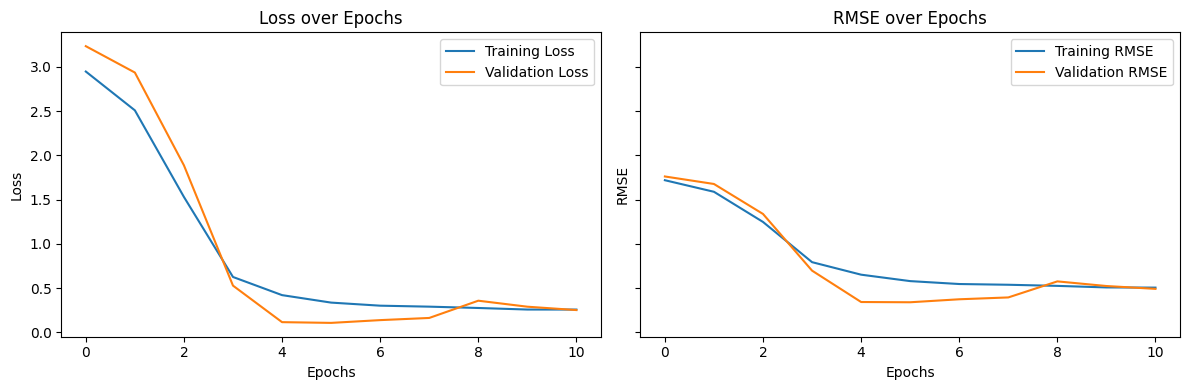

R squared on train set: -0.974828
R squared on valid set: -1.181535


In [52]:
def plot_loss_rmse(train_loss_per_epoch, train_rmse_per_epoch, valid_loss_per_epoch, valid_rmse_per_epoch):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
    
    ax1.plot(train_loss_per_epoch, label="Training Loss")
    ax1.plot(valid_loss_per_epoch, label="Validation Loss")
    ax1.set_title("Loss over Epochs")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend()

    ax2.plot(train_rmse_per_epoch, label="Training RMSE")
    ax2.plot(valid_rmse_per_epoch, label="Validation RMSE")
    ax2.set_title("RMSE over Epochs")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("RMSE")
    ax2.legend()
    
    plt.tight_layout()
    plt.show()    
    
plot_loss_rmse(train_loss_per_epoch, train_rmse_per_epoch, valid_loss_per_epoch, valid_rmse_per_epoch)
print(f"R squared on train set: {train_r_suqared:.6f}")
print(f"R squared on valid set: {valid_r_suqared:.6f}")

In [ ]:
# saving the model

### torch.save(model.state_dict(), "model.pth") ###


In [53]:
test_loss, test_rmse = valid_model(test_loader, model, loss_fn, device)
test_set_y = np.array([item[1][0] for item in test_set])
r_suqared = 1 - test_rmse**2 / np.var(test_set_y)
print(f"R squared on test set: {r_suqared:.6f}")

  Valid Batch 1/1, Loss: 0.218384, RMSE: 0.467316: 100%|█| 1/1 [00:08<00:00,  8.

R squared on test set: -0.026186


# Common questions:

1) Do I need to use only braindecode?

No! You can use any model that gets a tensor as input, outputs a tensor, and implements the forward method.

2) Can I apply extra preprocessing/dataset loader for the hidden data?
    
No, any transformation needs to be inside your model. but we are super open to contributions to the libraries (eggdash and braindecode) to accommodate any reasonable request.
